In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
%matplotlib inline


In [3]:
# Task 1: Load dữ liệu từ file nhiều sheet
#   Load file "File_assignment_9.xlsx", 1 sheet là 1 tháng, tương ứng với 1 dataframe, ví dụ:
import pandas as pd
df_jan = pd.read_excel(r"C:\Users\DUY UYEN\Desktop\PYTHON - DATAPOT\File_assignment_9.xlsx", sheet_name='Jan')
#  tương tự df_feb, df_mar cho tháng 2 và tháng 3
df_feb = pd.read_excel(r"C:\Users\DUY UYEN\Desktop\PYTHON - DATAPOT\File_assignment_9.xlsx", sheet_name='Feb')
df_march = pd.read_excel(r"C:\Users\DUY UYEN\Desktop\PYTHON - DATAPOT\File_assignment_9.xlsx", sheet_name='Mar')
print(df_jan)
print(df_feb)
print(df_march)

      date_key category shipping_type   revenue  qty  num_order  num_customer
0   2019-01-01   Cate B      standard  23636587  103         84            71
1   2019-01-01   Cate B      fastship   6217899   17         16            14
2   2019-01-01   Cate A      standard  14999325  100         58            52
3   2019-01-01   Cate A      fastship   1822173    9          6             5
4   2019-01-01   Cate C      standard  20642932    5          4             4
..         ...      ...           ...       ...  ...        ...           ...
181 2019-01-31   Cate A      standard  10538370   70         37            32
182 2019-01-31   Cate B      fastship  14740737   32         26            21
183 2019-01-31   Cate A      fastship   5251083   28         17            15
184 2019-01-31   Cate C      fastship  33546843    6          5             4
185 2019-01-31   Cate C      standard  29321639    6          6             4

[186 rows x 7 columns]
      date_key category shipping_type   

In [4]:
#  Task 2: Với dữ liệu mỗi tháng tính tổng revenue(doanh thu) và tổng qty (số lượng) từng category
total_revenue1 = df_jan.groupby('category')[['revenue']].sum()
total_revenue2 = df_feb.groupby('category')[['revenue']].sum()
total_revenue3 = df_march.groupby('category')[['revenue']].sum()
total_qty1 = df_jan.groupby('category')[['qty']].sum()
total_qty2 = df_feb.groupby('category')[['qty']].sum()
total_qty3 = df_march.groupby('category')[['qty']].sum()
print(total_revenue1)
print(total_revenue2)
print(total_revenue3)
print(total_qty1)
print(total_qty2)
print(total_qty3)


             revenue
category            
Cate A     673304157
Cate B     943144185
Cate C    2077955716
             revenue
category            
Cate A     605550824
Cate B     831377876
Cate C    1476453912
             revenue
category            
Cate A     861806468
Cate B    1139790702
Cate C    2372207101
           qty
category      
Cate A    4126
Cate B    3427
Cate C     377
           qty
category      
Cate A    3639
Cate B    2904
Cate C     267
           qty
category      
Cate A    5409
Cate B    3809
Cate C     428


In [5]:
# Optional: bạn nào muốn luyện nâng cao thêm thì viết function, input là df, output là tự tính ra tổng doanh thu và tổng qty của df từ input
# Coi lại record:
sheet_name = {1:total_revenue1, 2:total_revenue2, 3:total_revenue3}
def tinh_rev(month):
    df = sheet_name[month]
    result = df.groupby('category')[['revenue']].sum()
    return result
tinh_rev(1)

,revenue
category,
Cate A,673304157
Cate B,943144185
Cate C,2077955716


In [6]:
#  Task 3: Gộp cả 3 df lại theo dòng 
#  Hint: tham khảo lecture 8 đoạn
# Concat by row (default)
df_new = pd.concat([df_jan, df_feb, df_march], axis=0, ignore_index=True)
df_new 

,date_key,category,shipping_type,revenue,qty,num_order,num_customer
0,2019-01-01,Cate B,standard,23636587,103,84,71
1,2019-01-01,Cate B,fastship,6217899,17,16,14
2,2019-01-01,Cate A,standard,14999325,100,58,52
3,2019-01-01,Cate A,fastship,1822173,9,6,5
4,2019-01-01,Cate C,standard,20642932,5,4,4
...,...,...,...,...,...,...,...
535,2019-03-31,Cate A,standard,20552276,145,79,69
536,2019-03-31,Cate B,fastship,6286270,16,13,11
537,2019-03-31,Cate A,fastship,2856231,19,11,10
538,2019-03-31,Cate C,fastship,16245900,2,2,2


In [7]:
# Task 4: Tính tổng Revenue từng category cho cả quý 1. Hint : dùng group by
total_revenue = df_new.groupby('category')[['revenue']].sum().reset_index()
total_revenue

,category,revenue
0,Cate A,2140661449
1,Cate B,2914312763
2,Cate C,5926616729


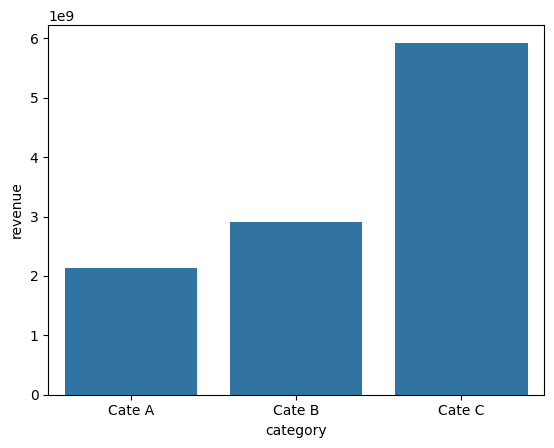

In [8]:
#  Task 5: Dựa trên kết quả task 4 Vẽ biểu đồ bar chart so sánh 3 category. Hint dùng Seaborn.barplot()
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=total_revenue, x="category", y="revenue")
plt.show()

In [9]:
# Optional of seperate file
import pandas as pd
file_path = ["Jan.xlsx", "Feb.xlsx"] # Tương tự với nhiều file
dataframes = []
for file in file_path:
    df = pd.read_excel(file)
    dataframes.append(df)
    
df_quy1 = pd.concat (dataframes, ignore_index = False)
 
df_quy1



,date_key,category,shipping_type,revenue,qty,num_order,num_customer
0,2019-01-01,Cate B,standard,23636587,103,84,71
1,2019-01-01,Cate B,fastship,6217899,17,16,14
2,2019-01-01,Cate A,standard,14999325,100,58,52
3,2019-01-01,Cate A,fastship,1822173,9,6,5
4,2019-01-01,Cate C,standard,20642932,5,4,4
...,...,...,...,...,...,...,...
163,2019-02-28,Cate A,standard,17549656,113,67,59
164,2019-02-28,Cate A,fastship,3413887,17,11,10
165,2019-02-28,Cate B,fastship,9920281,23,18,16
166,2019-02-28,Cate C,standard,33714142,6,5,4
